In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install scikit-learn

In [2]:
csv1 = pd.read_csv("../Data/2015.csv")

## _First step_
#### As a first measure for this EDA, made up of several csvs, we will do a deep exploratory analysis of the first csv, which is about the first registered year (2015).

- Dataset records


In [3]:
csv1.shape

(158, 12)

We observe that the 2015 dataset has 158 records, one would think that they are the number of countries participating in this study, with 11 characteristics, for each record.


- Dataset structure

In [4]:
csv1.head(5)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


With this information we can rectify what we had already previewed in the previous point, and that is that the first column of our dataset is about the country of which we are going to treat these characteristics.
We see that most of our variables have floating data that we can see as percentages as well.
We can base ourselves on the happiness score and rank to make a possible prediction, with the other variables and see if we get close to this metric.

In [5]:
csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
missing_data = csv1.isnull().sum()
missing_data

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Observamos que nuestro dataset no cuenta con datos faltantes

We observe the type of variables and see which are the floating type and the integer type to be able to differentiate.

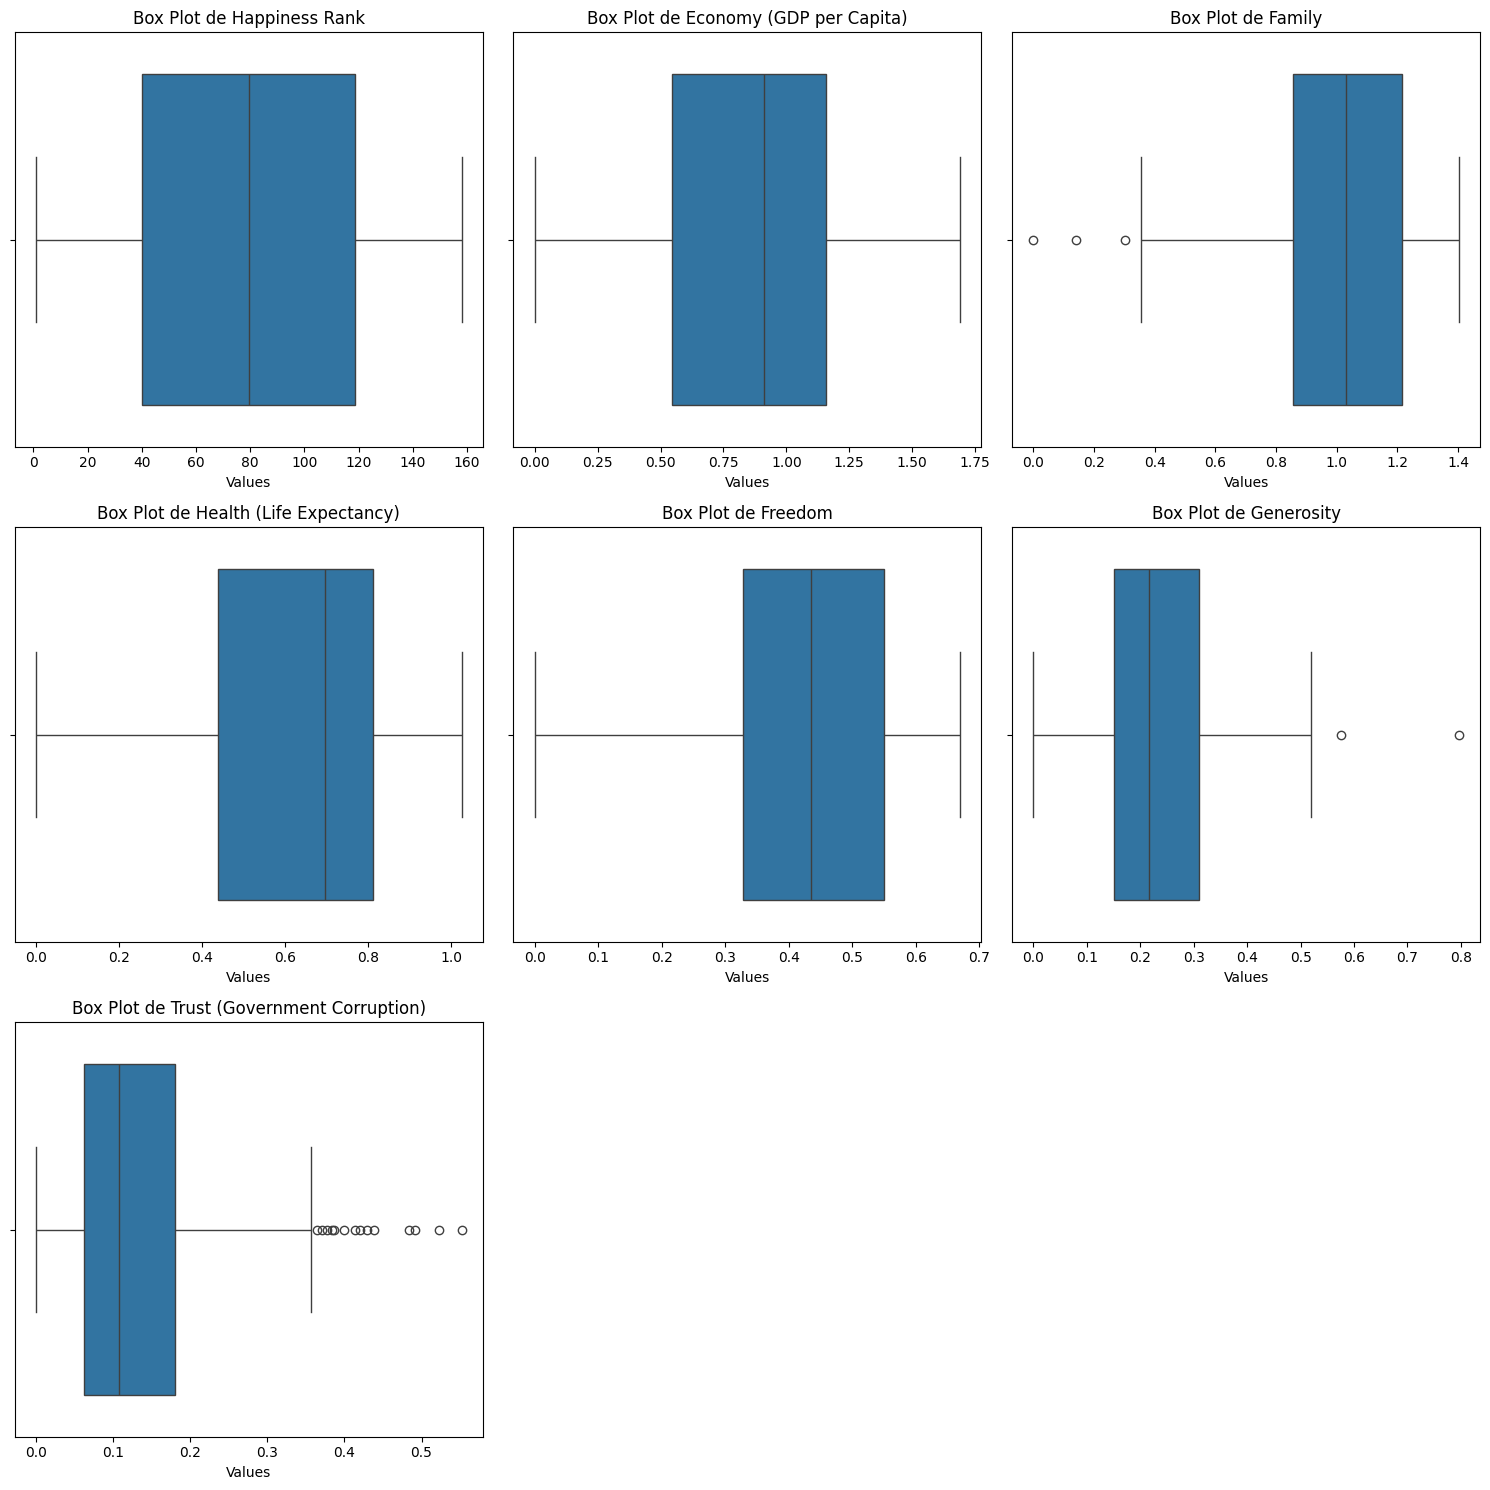

In [7]:
# Boxplots
variables = ['Happiness Rank', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

num_vars = len(variables)
num_cols = 3 
num_rows = (num_vars + num_cols - 1) // num_cols  
plt.figure(figsize=(15, num_rows * 5))

#Boxplot for variable
for i, variable in enumerate(variables):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=csv1[variable])
    plt.title(f'Box Plot de {variable}')
    plt.xlabel('Values')

plt.tight_layout()
plt.show()




In [8]:
csv1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


- Here we can see the main statistics for our variables, where we can highlight means
averages like the happiness score because it is 5.23 because compared to the maximum which is 7.58 it can be said that there is a good average since the lowest is 2.8, very central
- For the minimums, in 6 variables of the dataset we can see that it is 0, we highlight the variable life expectancy, clearly the minimum is going to be 0, so let's start counting from here.


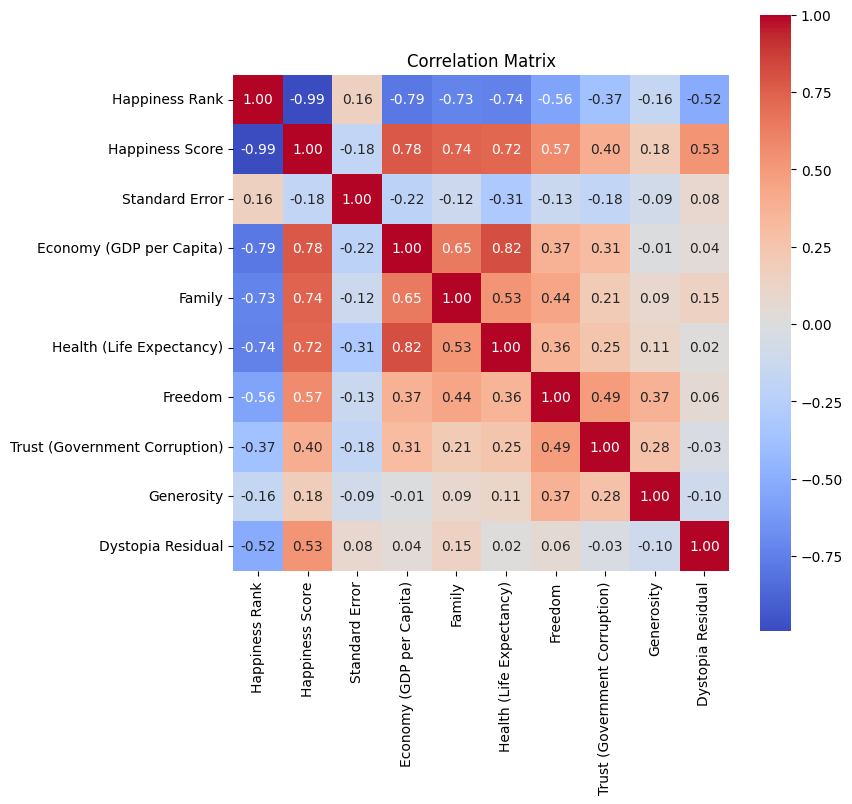

In [9]:
columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 
           'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity', 
           'Dystopia Residual']
selected_columns = csv1[columns]


correlation_matrix = selected_columns.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

We clearly see a correlation between some variables in this matrix, and this was the intention. to know which variables were correlated, to see if they depended on each other, or if we can rely on some of these to be able to make the prediction.
- Happiness and life expectancy: This correlation is positive, which means that countries with higher life expectancy also tend to have greater happiness.
- Happiness and GDP per capita: This suggests that money is not the only factor that contributes to happiness, but it does play an important role.
- Happiness and trust in government: This is consistent with research suggesting that trust in institutions is important for social well-being.

Then we understand that the happiness of a country has a very good correlation with these characteristics.

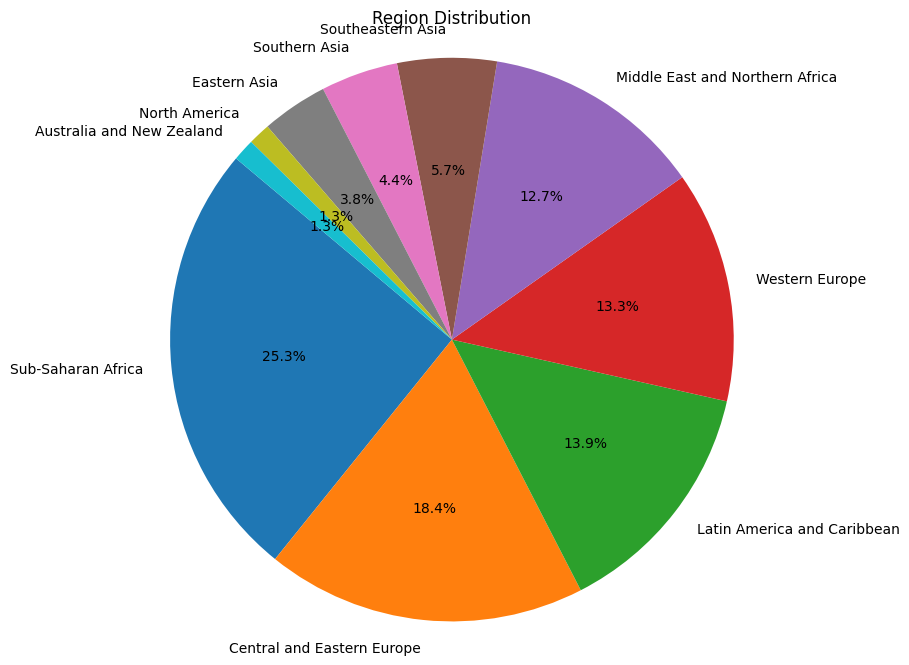

In [10]:
region_counts = csv1['Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Region Distribution')
plt.axis('equal') 
plt.show()

We have different regions in the dataset, but through this graph we see the distribution of these, and how many regions there are, since they are not divided by continents as such, but as we see it is well defined.

## Now the general info por the other datasets (other years)

### 2016 info

In [11]:
csv2= pd.read_csv("../Data/2016.csv")

In [12]:
csv2.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [13]:
csv2.shape

(157, 13)

In [14]:
csv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

### 2017 info

In [15]:
csv3= pd.read_csv("../Data/2017.csv")

In [16]:
csv3.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [17]:
csv3.shape

(155, 12)

In [18]:
csv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

### 2018 info


In [19]:
csv4= pd.read_csv("../Data/2018.csv")

In [20]:
csv4.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [21]:
csv4.shape

(156, 9)

In [22]:
csv4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### 2019 info

In [23]:
csv5= pd.read_csv("../Data/2019.csv")

In [24]:
csv5.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
csv5.shape

(156, 9)

In [26]:
csv5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## Transformations for the merge.

### In each of the csvs we will make different modifications so that they can be put together. We will write the modifications that must be made.

- We will define a scheme of variables so that they all remain the same, that scheme will be the following:
 - For the size of the dataset, in terms of variables, we will have 8 variables, these will be the following, and they will be assigned a general name, so that later through the transformations we can place all the csvs the same.
 - General name of the final variables: Ranking, Country or region, Score, GDP per capita, Life expectancy, Freedom, Generosity, Corruption.
- The first modification that we can see is that at the time of ranking in some csvs it is different so I will stigmatize it with the name Ranking.
- The second modification will be in 2015 and in 2016 the family column exists, it will be deleted.
- Change the corruption column to the name Corruption in all datasets, and leave only 3 digits after 0.
- Leave 3 digits after 0 in Generosity.
- Change the name in the last 2 years from Freedom to make life choices, to Freedom.
- Change these columns Health (Life Expectancy), Healthy life expectancy, Health..Life.Expectancy. To Healthy.


### Changes For the first CSV (2015 year)

In [27]:
# Drop columns
csv1.drop(['Region', 'Standard Error','Family','Dystopia Residual'], axis=1, inplace=True)
 

In [28]:
csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.0+ KB


In [29]:
# Rename of the columns
csv1.rename(columns={'Country': 'Country or region'}, inplace=True)
csv1.rename(columns={'Happiness Rank': 'Ranking'}, inplace=True)
csv1.rename(columns={'Happiness Score': 'Score'}, inplace=True)
csv1.rename(columns={'Economy (GDP per Capita)': 'GDP per capita'}, inplace=True)
csv1.rename(columns={'Health (Life Expectancy)': 'Life Expectancy'}, inplace=True)
csv1.rename(columns={'Trust (Government Corruption)': 'Corruption'}, inplace=True)
csv1.rename(columns={'Health (Life Expectancy)': 'Life Expectancy'}, inplace=True)

In [30]:
csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or region  158 non-null    object 
 1   Ranking            158 non-null    int64  
 2   Score              158 non-null    float64
 3   GDP per capita     158 non-null    float64
 4   Life Expectancy    158 non-null    float64
 5   Freedom            158 non-null    float64
 6   Corruption         158 non-null    float64
 7   Generosity         158 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.0+ KB


In [31]:
csv1['Year'] = 2015

In [32]:
csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or region  158 non-null    object 
 1   Ranking            158 non-null    int64  
 2   Score              158 non-null    float64
 3   GDP per capita     158 non-null    float64
 4   Life Expectancy    158 non-null    float64
 5   Freedom            158 non-null    float64
 6   Corruption         158 non-null    float64
 7   Generosity         158 non-null    float64
 8   Year               158 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 11.2+ KB


### Changes For the second CSV (2016 year)

In [33]:
# Drop columns
csv2.drop(['Region','Family','Dystopia Residual','Lower Confidence Interval','Upper Confidence Interval','Family'], axis=1, inplace=True)

In [34]:
csv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Happiness Rank                 157 non-null    int64  
 2   Happiness Score                157 non-null    float64
 3   Economy (GDP per Capita)       157 non-null    float64
 4   Health (Life Expectancy)       157 non-null    float64
 5   Freedom                        157 non-null    float64
 6   Trust (Government Corruption)  157 non-null    float64
 7   Generosity                     157 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.9+ KB


In [35]:
# Rename of the columns
csv2.rename(columns={'Country': 'Country or region'}, inplace=True)
csv2.rename(columns={'Happiness Rank': 'Ranking'}, inplace=True)
csv2.rename(columns={'Happiness Score': 'Score'}, inplace=True)
csv2.rename(columns={'Economy (GDP per Capita)': 'GDP per capita'}, inplace=True)
csv2.rename(columns={'Health (Life Expectancy)': 'Life Expectancy'}, inplace=True)
csv2.rename(columns={'Trust (Government Corruption)': 'Corruption'}, inplace=True)


In [36]:
csv2['Year'] = 2016

In [37]:
csv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or region  157 non-null    object 
 1   Ranking            157 non-null    int64  
 2   Score              157 non-null    float64
 3   GDP per capita     157 non-null    float64
 4   Life Expectancy    157 non-null    float64
 5   Freedom            157 non-null    float64
 6   Corruption         157 non-null    float64
 7   Generosity         157 non-null    float64
 8   Year               157 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 11.2+ KB


### Changes For the third CSV (2017 year)

In [38]:
# Drop columns
csv3.drop(['Whisker.high','Whisker.low','Family','Dystopia.Residual'], axis=1, inplace=True)


In [39]:
csv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Economy..GDP.per.Capita.       155 non-null    float64
 4   Health..Life.Expectancy.       155 non-null    float64
 5   Freedom                        155 non-null    float64
 6   Generosity                     155 non-null    float64
 7   Trust..Government.Corruption.  155 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.8+ KB


In [40]:
# Rename of the columns
csv3.rename(columns={'Country': 'Country or region'}, inplace=True)
csv3.rename(columns={'Happiness.Rank': 'Ranking'}, inplace=True)
csv3.rename(columns={'Happiness.Score': 'Score'}, inplace=True)
csv3.rename(columns={'Economy..GDP.per.Capita.': 'GDP per capita'}, inplace=True)
csv3.rename(columns={'Health..Life.Expectancy.': 'Life Expectancy'}, inplace=True)
csv3.rename(columns={'Trust..Government.Corruption.': 'Corruption'}, inplace=True)

In [41]:
csv3['Year'] = 2017

In [42]:
csv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or region  155 non-null    object 
 1   Ranking            155 non-null    int64  
 2   Score              155 non-null    float64
 3   GDP per capita     155 non-null    float64
 4   Life Expectancy    155 non-null    float64
 5   Freedom            155 non-null    float64
 6   Generosity         155 non-null    float64
 7   Corruption         155 non-null    float64
 8   Year               155 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 11.0+ KB


### Changes For the fourth CSV (2018 year)

In [43]:
# Drop columns
csv4.drop(['Social support'], axis=1, inplace=True)

In [44]:
csv4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     155 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.9+ KB


In [45]:
# Rename of the columns
csv4.rename(columns={'Overall rank': 'Ranking'}, inplace=True)
csv4.rename(columns={'Healthy life expectancy': 'Life Expectancy'}, inplace=True)
csv4.rename(columns={'Perceptions of corruption': 'Corruption'}, inplace=True)
csv4.rename(columns={'Freedom to make life choices': 'Freedom'}, inplace=True)

In [46]:
csv4['Year'] = 2018

In [47]:
csv4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            156 non-null    int64  
 1   Country or region  156 non-null    object 
 2   Score              156 non-null    float64
 3   GDP per capita     156 non-null    float64
 4   Life Expectancy    156 non-null    float64
 5   Freedom            156 non-null    float64
 6   Generosity         156 non-null    float64
 7   Corruption         155 non-null    float64
 8   Year               156 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 11.1+ KB


### Changes For the fifth CSV (2019 year)

In [48]:
# Drop columns
csv5.drop(['Social support'], axis=1, inplace=True)

In [49]:
csv5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.9+ KB


In [50]:
# Rename of the columns
csv5.rename(columns={'Overall rank': 'Ranking'}, inplace=True)
csv5.rename(columns={'Healthy life expectancy': 'Life Expectancy'}, inplace=True)
csv5.rename(columns={'Perceptions of corruption': 'Corruption'}, inplace=True)
csv5.rename(columns={'Freedom to make life choices': 'Freedom'}, inplace=True)

In [51]:
csv5['Year'] = 2019

In [52]:
csv5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            156 non-null    int64  
 1   Country or region  156 non-null    object 
 2   Score              156 non-null    float64
 3   GDP per capita     156 non-null    float64
 4   Life Expectancy    156 non-null    float64
 5   Freedom            156 non-null    float64
 6   Generosity         156 non-null    float64
 7   Corruption         156 non-null    float64
 8   Year               156 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 11.1+ KB


### Join the datasets into one


In [53]:
dataframes = [csv1, csv2, csv3, csv4, csv5] 
df_concat = pd.concat(dataframes, ignore_index=True)

In [54]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or region  782 non-null    object 
 1   Ranking            782 non-null    int64  
 2   Score              782 non-null    float64
 3   GDP per capita     782 non-null    float64
 4   Life Expectancy    782 non-null    float64
 5   Freedom            782 non-null    float64
 6   Corruption         781 non-null    float64
 7   Generosity         782 non-null    float64
 8   Year               782 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 55.1+ KB


In [55]:
df_concat = df_concat.dropna()
print(df_concat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or region  781 non-null    object 
 1   Ranking            781 non-null    int64  
 2   Score              781 non-null    float64
 3   GDP per capita     781 non-null    float64
 4   Life Expectancy    781 non-null    float64
 5   Freedom            781 non-null    float64
 6   Corruption         781 non-null    float64
 7   Generosity         781 non-null    float64
 8   Year               781 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 61.0+ KB
None


In [56]:
df_concat = df_concat.drop(columns=['Ranking', 'Country or region'])

In [57]:
df_concat = pd.get_dummies(df_concat, columns=['Year'])

In [58]:
df_concat[['Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019']] = df_concatenado[['Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019']].astype(int)

In [59]:
df_concat

,Score,GDP per capita,Life Expectancy,Freedom,Corruption,Generosity,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,1,0,0,0,0
1,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,1,0,0,0,0
2,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,1,0,0,0,0
3,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,1,0,0,0,0
4,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
777,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,0,0,0,0,1
778,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,0,0,0,0,1
779,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,0,0,0,0,1
780,3.083,0.02600,0.10500,0.22500,0.03500,0.23500,0,0,0,0,1


In [60]:
column_renames = {
    "GDP per capita": "gdp_per_capita",
    "Life Expectancy": "life_expectancy",
    "Freedom": "freedom",
    "Corruption": "corruption",
    "Generosity": "generosity",
    "Year_2015": "year_2015",
    "Year_2016": "year_2016",
    "Year_2017": "year_2017",
    "Year_2018": "year_2018",
    "Year_2019": "year_2019",
}

# Rename the columns
df_concat.rename(columns=column_renames, inplace=True)

# HERE THE MODEL TRAINING PROCESS BEGINS


### The first process will be to partition the dataset

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_concat.drop(columns=['Score'])
y = df_concat['Score']

# 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [74]:
X_test.to_csv('../Data/test.csv', index=False)

In [76]:
y_test.to_csv('../Data/ytest.csv')

In [63]:
X_train

,gdp_per_capita,life_expectancy,freedom,corruption,generosity,year_2015,year_2016,year_2017,year_2018,year_2019
609,0.344000,0.211000,0.394000,0.094000,0.185000,0,0,0,1,0
578,0.429000,0.433000,0.406000,0.082000,0.138000,0,0,0,1,0
528,1.151000,0.599000,0.399000,0.025000,0.065000,0,0,0,1,0
341,1.343280,0.821944,0.588767,0.153066,0.574731,0,0,1,0,0
352,1.361356,0.519983,0.518631,0.008965,0.325296,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
716,0.987000,0.815000,0.216000,0.027000,0.166000,0,0,0,0,1
768,0.274000,0.555000,0.148000,0.041000,0.169000,0,0,0,0,1
72,1.151740,0.773610,0.448880,0.151840,0.086800,1,0,0,0,0
235,1.164920,0.647180,0.238890,0.123480,0.047070,0,1,0,0,0


In [64]:
X_test.head(10).to_csv('../Data/data_test.csv', index=False)

In [65]:
y_test.head(10)

647    6.726
265    4.754
111    4.677
301    3.763
339    6.578
605    4.141
625    2.905
202    6.078
704    5.373
678    5.940
Name: Score, dtype: float64

In [66]:
y_test.head(10).to_csv('../Data/y_test.csv',index = False)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#Model to use
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Next step, the predictions

In [68]:
y_pred = model.predict(X_test)
y_pred

array([6.7004028 , 4.57681908, 4.65601948, 3.46308407, 5.73149486,
       4.18751344, 2.95814309, 5.63750871, 5.4366198 , 5.56464499,
       5.95514402, 4.94374657, 5.43960949, 4.0008759 , 4.68316263,
       6.86611531, 4.83547156, 6.29346484, 5.90664404, 6.89227217,
       5.4568814 , 4.58931719, 5.68616742, 5.72823206, 5.49553128,
       3.99155461, 4.67939368, 4.84243186, 3.83195897, 5.43964864,
       7.0374481 , 4.9924176 , 5.81198359, 3.93185589, 5.0653501 ,
       5.85409075, 5.38623524, 5.75976877, 5.36385497, 6.17331543,
       4.82743007, 7.01658822, 4.64121059, 3.81783738, 7.00991289,
       5.92011337, 3.80095946, 6.87112763, 3.51622923, 4.80972241,
       5.02001948, 3.99450858, 4.45788717, 5.60358503, 3.65439374,
       4.01091514, 5.57258169, 6.83822386, 5.28272341, 3.87750665,
       6.07218107, 4.71602947, 4.695241  , 6.08464424, 4.30483267,
       5.37838534, 7.14310424, 4.54158767, 6.4230526 , 6.25589552,
       5.20681248, 6.90542877, 5.48201128, 5.57741986, 4.54117

### How good is our model? METRICS

In [69]:
# Metric
r2 = r2_score(y_test, y_pred)
print(f'(R^2): {r2}')

(R^2): 0.7858492077744521


In [70]:
!pip install joblib

In [71]:
#save the model
import joblib
joblib.dump(model,'../Models/regresion_lineal.pkl')

['../Models/regresion_lineal.pkl']

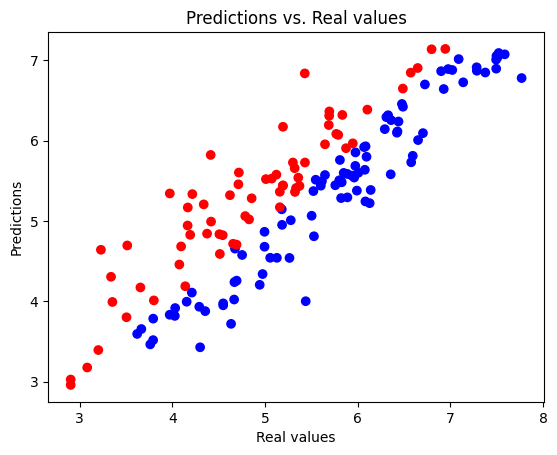

In [72]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
# Caltulate the metric por the grafich
diferencia = y_pred - y_test
colors = ['red' if diff > 0 else 'blue' for diff in diferencia]


plt.scatter(y_test, y_pred, color=colors)
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Predictions vs. Real values')
plt.show()



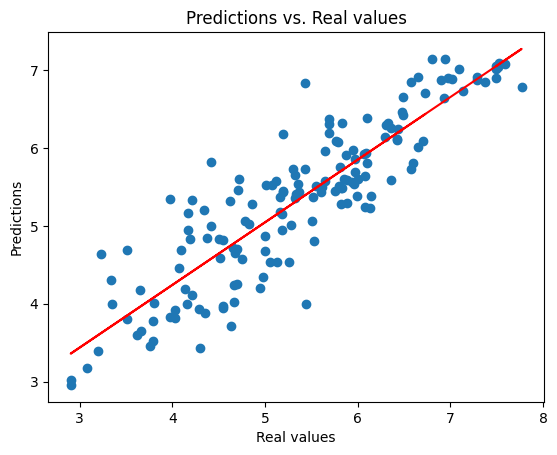

In [73]:
slope, intercept = np.polyfit(y_test, y_pred, 1)

plt.scatter(y_test, y_pred)
plt.plot(y_test, slope*y_test + intercept, color='red')  
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Predictions vs. Real values')
plt.show()
